In [1]:
#level_curves.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 17 March 2018.
#plot phase-space diagrams for ringlets librating about their fixed point

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [13]:
#restore output
parent_folders = ["I_0.0310/", "I_0.0616/"]
da_list = []
de_list = []
dwt_list = []
a_avg_list = []
e_avg_list = []
from helper_fns import *
from libration import *
for parent_folder in parent_folders:
    #read simulation output
    input_file = parent_folder + "inputs.py"
    execfile(input_file)
    the_output_folder = parent_folder + output_folder
    print 'reading output in folder = ', the_output_folder
    r, t, vr, vt, times, lambda0 = restore_output(the_output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    print 'r.shape = ', r.shape
    #get da, de, dwt differences at inner & outer streamline's periapse
    da, de, dwt, a_avg, e_avg = calculate_deltas(r, a, e, wt)
    da_list += [da]
    de_list += [de]
    dwt_list += [dwt]
    a_avg_list += [a_avg]
    e_avg_list += [e_avg]
    #BGT fixed point
    M_central = 1.0
    Ra = (Rp/a_avg).mean()
    da_over_a = (da/a_avg).mean()
    H, q2 = H_q2(a_avg, e_avg, da, de, dwt)
    H_avg = 0.5*(H.min() + H.max())
    de_eq_bgt = (21.0/4)*np.pi*e_avg.mean()*J2*(M_central/total_ring_mass)*(Ra**2)*(da_over_a**3)/H_avg
    print 'BGT equilibrium de = ', de_eq_bgt

reading output in folder =  I_0.0310/output
r.shape =  (1001, 2, 101)
BGT equilibrium de =  0.000636172496041
reading output in folder =  I_0.0616/output
r.shape =  (1001, 2, 101)
BGT equilibrium de =  0.000634247436327


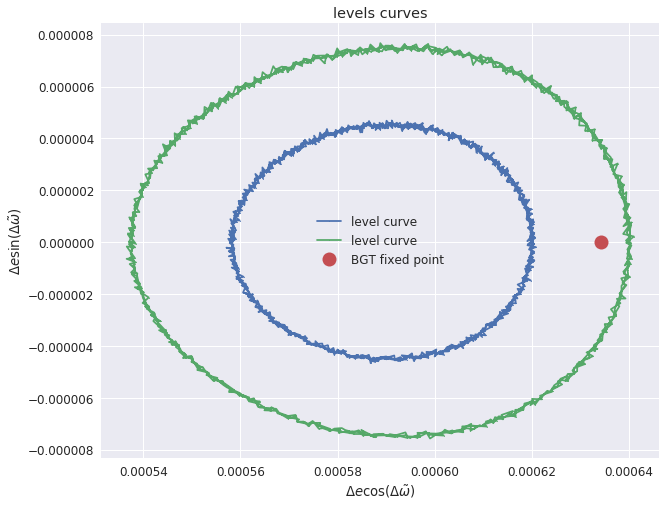

In [16]:
#plot level curves
sns.set(font_scale=1.2, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 8))
p = ax.set_title('levels curves')
p = ax.set_xlabel(r'$\Delta e\cos(\Delta\tilde{\omega})$')
p = ax.set_ylabel(r'$\Delta e\sin(\Delta\tilde{\omega}$)')
for idx in range(len(de_list)):
    de = de_list[idx]
    dwt = dwt_list[idx]
    x = de*np.cos(dwt)
    y = de*np.sin(dwt)
    p = ax.plot(x, y, marker='o', markersize=1, linestyle='-', label='level curve')
    #p = ax.plot(de_eq, 0, marker='X', markersize=14, linestyle='none', label='simulation')
p = ax.plot(de_eq_bgt, 0, marker='o', markersize=14, linestyle='none', label='BGT fixed point')
p = plt.legend()

r.shape =  (1001, 2, 101)
r.shape =  (1001, 2, 101)
r.shape =  (1001, 2, 101)
r.shape =  (1001, 2, 101)
r.shape =  (1001, 2, 101)
r.shape =  (1001, 2, 101)
r.shape =  (1001, 2, 101)


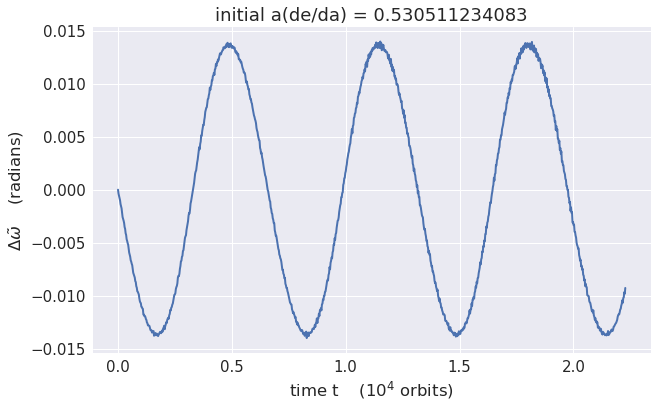

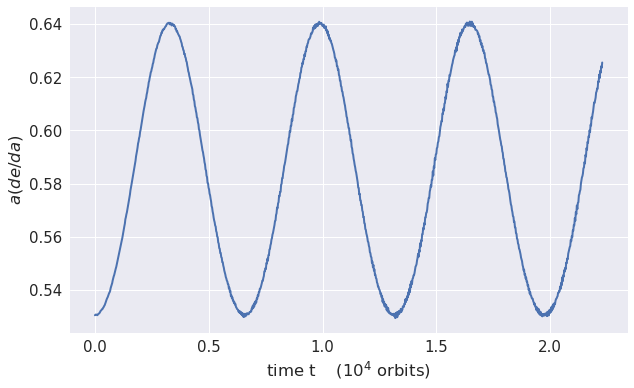

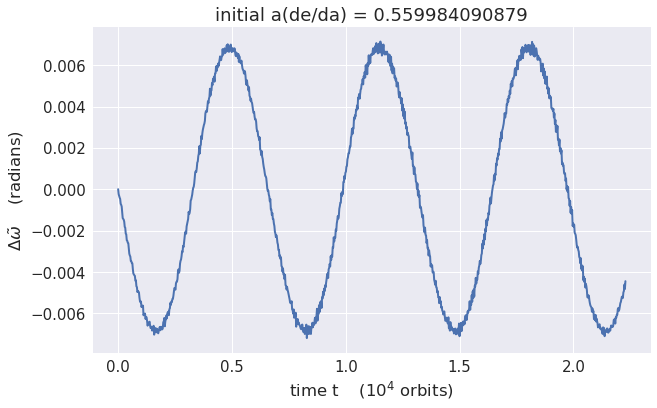

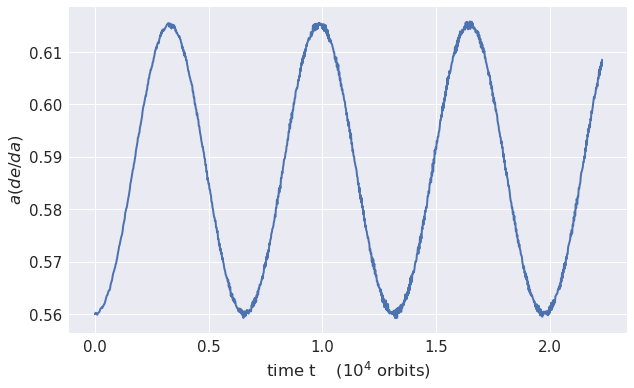

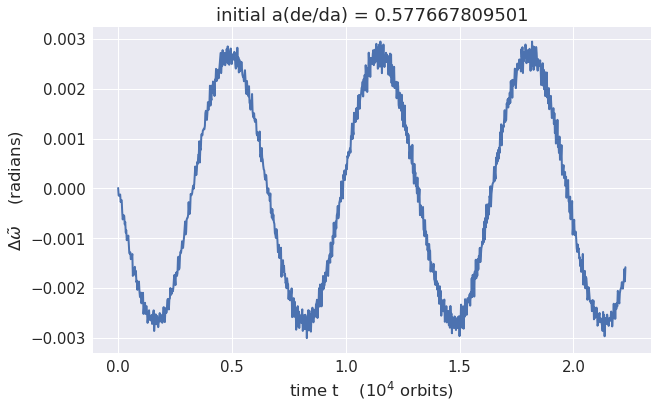

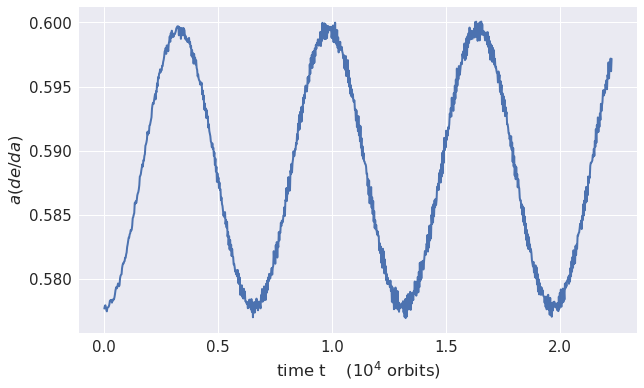

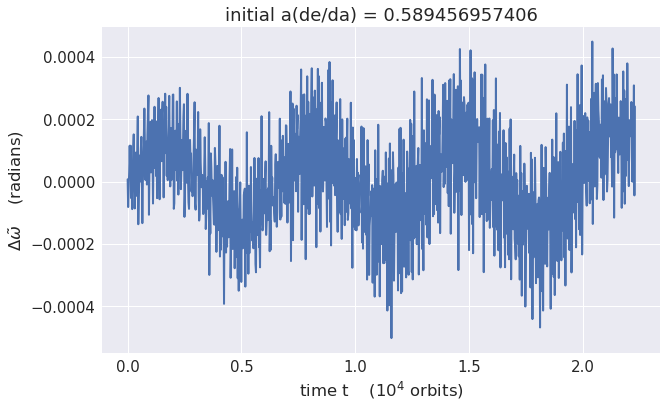

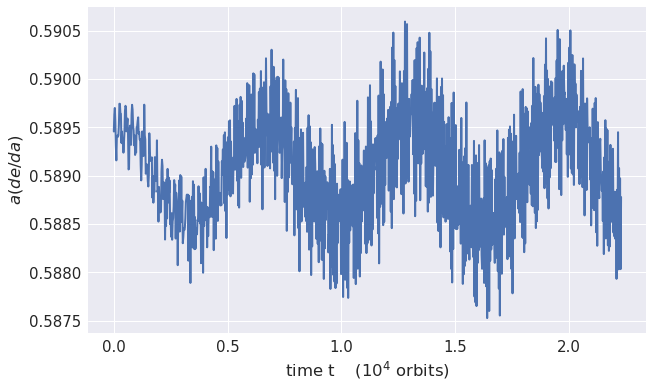

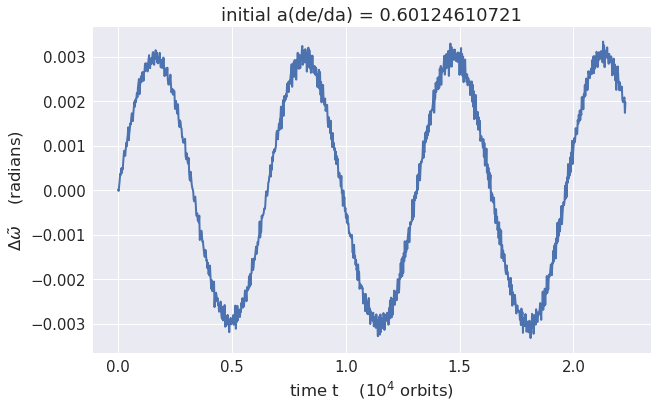

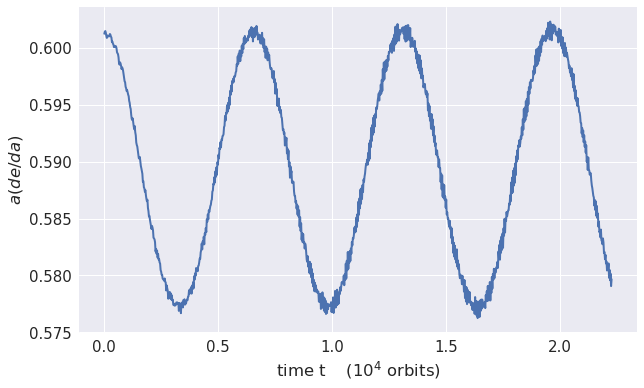

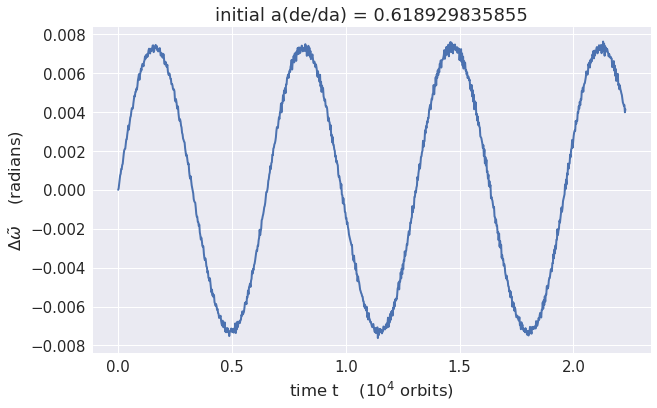

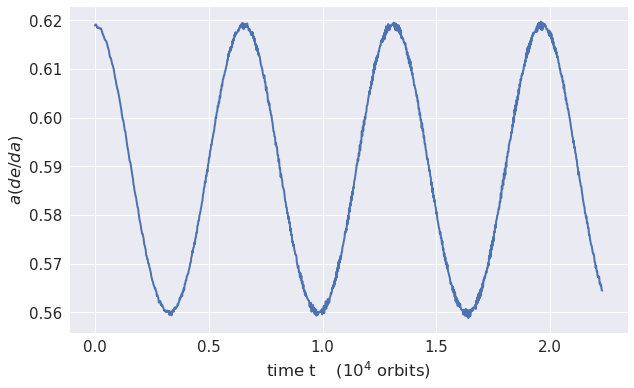

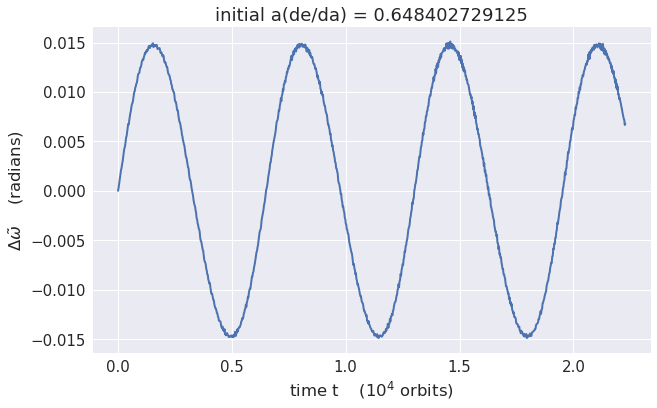

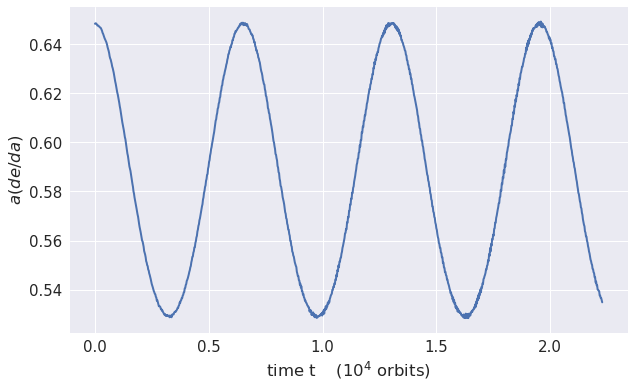

In [34]:
#restore output
from helper_fns import *
parent_folders = ["adeda_factor=0.9/", "adeda_factor=0.95/", "adeda_factor=0.98/", "adeda_factor=1.0/", "adeda_factor=1.02/", "adeda_factor=1.05/", "adeda_factor=1.1/"]
all_adeda = []
all_delta_wt = []
all_a = []
all_e = []
for parent_folder in parent_folders:
    input_file = parent_folder + "inputs.py"
    execfile(input_file)
    the_output_folder = parent_folder + output_folder
    r, t, vr, vt, times, lambda0 = restore_output(the_output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    print 'r.shape = ', r.shape
    #calculate delta_wt delta_e delta_a versus time
    delta_wt = []
    delta_e = []
    delta_a = []
    a_avg = []
    for tidx in range(len(times)):
        r0 = r[tidx]
        r_inner = r0[0]
        r_outer = r0[1]
        pidx_inner = r_inner.argmin()  
        pidx_outer = r_outer.argmin()    
        wt0 = wt[tidx]
        wt_inner = wt0[0]
        wt_outer = wt0[1]
        dwt = wt_outer[pidx_outer] - wt_inner[pidx_inner]
        if (dwt > np.pi):
            dwt -= 2*np.pi
        if (dwt < -np.pi):
            dwt += 2*np.pi
        delta_wt += [dwt]
        e0 = e[tidx]
        e_inner = e0[0]
        e_outer = e0[1]
        de = e_outer[pidx_outer] - e_inner[pidx_inner]
        delta_e += [de]
        a0 = a[tidx]
        a_avg += [a0.mean()]
        a_inner = a0[0]
        a_outer = a0[1]
        da = a_outer[pidx_outer] - a_inner[pidx_inner]
        delta_a += [da]
    delta_wt = np.array(delta_wt)
    delta_e = np.array(delta_e)
    delta_a = np.array(delta_a)
    adeda = a_avg*delta_e/delta_a
    #plot delta_wt and delta_e versus time
    x = times/(2*np.pi)/1.0e4
    y = delta_wt
    f, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, y, linestyle='-', linewidth=2)
    ttl = 'initial a(de/da) = ' + str(adeda[0])
    p = ax.set_title(ttl)
    p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
    p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (radians)')
    x = times/(2*np.pi)/1.0e4
    y = adeda
    f, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, y, linestyle='-', linewidth=2)
    p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
    p = ax.set_ylabel(r'$a(de/da)$')
    all_adeda += [adeda]
    all_delta_wt += [delta_wt]
    all_a += [a_avg]
    all_e += [e.mean()]

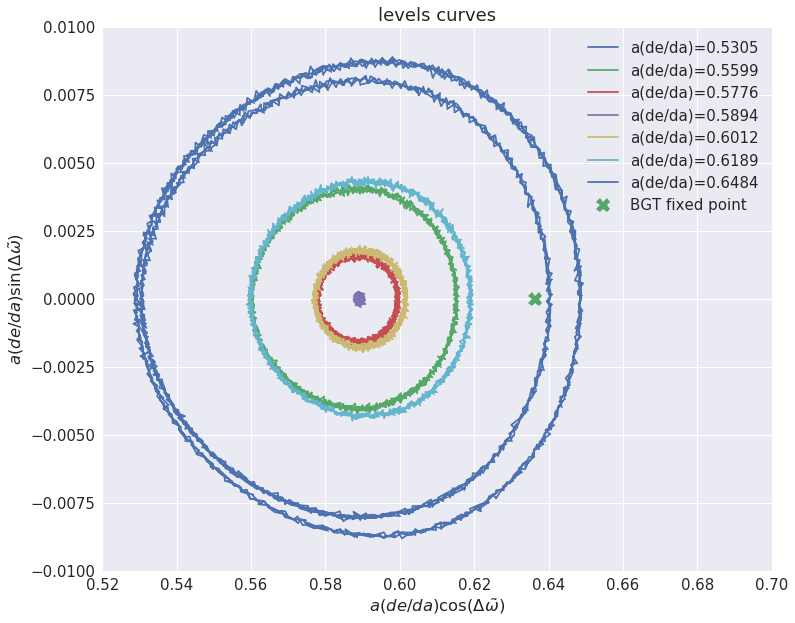

In [40]:
#plot delta_wt and delta_e versus time
f, ax = plt.subplots(figsize=(12, 10))
p = ax.set_title('levels curves')
p = ax.set_xlabel(r'$a(de/da)\cos(\Delta\tilde{\omega})$')
p = ax.set_ylabel(r'$a(de/da)\sin(\Delta\tilde{\omega}$)')
p = ax.set_xlim(0.52, 0.7)
p = ax.set_ylim(-0.01, 0.01)
for idx in range(len(all_adeda)):
    adeda = all_adeda[idx]
    delta_wt = all_delta_wt[idx]
    x = adeda*np.cos(delta_wt)
    y = adeda*np.sin(delta_wt)
    label = 'a(de/da)=' + str(adeda[0])[0:6]
    ax.plot(x, y, marker='o', markersize=1, linestyle='-', label=label)
x_eq = 0.63635048694
y_eq = 0.0
ax.plot(x_eq, y_eq, marker='X', markersize=14, linestyle='none', label='BGT fixed point')
p = plt.legend()